<a href="https://colab.research.google.com/github/maximo261199/FINAL/blob/main/TSPBackTracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%file pag92.csv
PIURA,AYABACA,SUYO,LA COPA,-4.573242,-80.081772,67,259
PIURA,PIURA,LA ARENA,JESUS MARIA,-5.31377,-80.706803,52,251
PIURA,AYABACA,FRIAS,CACHIRIS,-4.855265,-79.922737,53,249
PIURA,MORROPON,CHULUCANAS,CHARANAL (CHARANAL BAJO),-5.121276,-80.081937,75,249
PIURA,MORROPON,CHULUCANAS,CRUZ DE CAMPANAS,-4.994016,-80.191894,58,249
PIURA,HUANCABAMBA,SAN MIGUEL DE EL FAIQUE,EL HIGUERON,-5.456718,-79.60266,76,248
PIURA,PIURA,LA ARENA,EL PEÑAL,-5.346272,-80.72849,61,247
PIURA,MORROPON,CHULUCANAS,LA UNION,-5.096311,-80.048256,77,246

Writing pag92.csv


In [ ]:
PIURA,AYABACA,PAIMAS,TOMAPAMPA DE CARDAL,-4.61311,-80.037923,69,245
PIURA,PIURA,TAMBO GRANDE,PUEBLO NUEVO,-4.854288,-80.223417,70,240
PIURA,SECHURA,CRISTO NOS VALGA,CERRITOS,-5.498407,-80.718522,66,239
PIURA,PIURA,LA UNION,TUNAPE,-5.369381,-80.738653,65,237
PIURA,PIURA,LAS LOMAS,SAN MIGUEL DE YUSCAY,-4.68989,-80.23336,69,237
PIURA,PIURA,TAMBO GRANDE,EL FRUTAL,-4.892871,-80.35999,60,234
PIURA,MORROPON,BUENOS AIRES,PAMPA FLORES,-5.19746,-79.926072,68,232
PIURA,MORROPON,CHULUCANAS,PANECILLO,-5.052264,-80.101261,77,230
PIURA,MORROPON,CHULUCANAS,EL AROMO,-5.09531,-80.112786,57,229
PIURA,MORROPON,MORROPON,FRANCO BAJO,-5.17355,-80.047805,67,226

[0, 2, 5, 7, 3, 6, 1, 4]
[375.6082925994674]


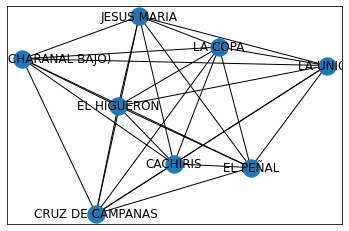

In [ ]:
import math
from math import radians, cos, sin, asin, sqrt
import csv
import numpy as np
from sys import maxsize
from itertools import permutations
import matplotlib.pyplot as plt
from pandas  import *
from networkx import *

Ndepa = []
Nprov = []
Ndistri = []
Ncentpob = []
QlatitudY = []
QlongitudX = []
NumViviendas = []
Qpoblacion = []
distancias = [[0]*len(QlatitudY) for _ in range(len(QlatitudY))]

def haversine(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    return c * r

def genAdjMatrixnp(n):
  mat = np.zeros(n*n)
  return mat.reshape((n, n))

def TSP_Backtraking(mat, visited, v,cont, cost, cmn):
    n = len(mat)
    if (cont == n and mat[v][nodo]):
      minpes = cost + mat[v][nodo]
      if answer[0] > minpes:
        answer[0] = minpes
        if len(cmn) != 0:
            pathBT.clear()
            for i in range(len(cmn)):
                pathBT.append(cmn[i])
      return

    for i in range(n):
        if (visited[i] == False and mat[v][i]):
            visited[i] = True
            cmn.append(i)
            TSP_Backtraking(mat, visited, i,cont + 1,cost + mat[v][i],cmn)
            cmn.pop()
            visited[i] = False

with open(file="pag92.csv", encoding='utf-8') as f:
    archivo = csv.reader(f)
    for s in archivo:
        Ndepa.append(s[0])
        Nprov.append(s[1])
        Ndistri.append(s[2])
        Ncentpob.append(s[3])
        QlatitudY.append(float(s[4]))
        QlongitudX.append(float(s[5]))
        NumViviendas.append(int(s[6]))
        Qpoblacion.append(int(s[7]))
distancias = genAdjMatrixnp(len(QlongitudX))

for i in range(len(QlatitudY)):
    for j in range(len(QlongitudX)):#int(math.hypot(x[i]-x[j], y[i]-y[j]))
        if i < j:
            distancias[i][j] = haversine(QlongitudX[i], QlatitudY[i],QlongitudX[j], QlatitudY[j])
            distancias[j][i] = haversine(QlongitudX[i], QlatitudY[i],QlongitudX[j], QlatitudY[j])

nodo = 0
answer = []
answer.append(math.inf)
v = [False for i in range(12)]
v[nodo] = True
camino = []
camino.append(nodo)
pathBT = []

labels = Ncentpob
A2 = DataFrame(distancias, index=labels, columns=labels)
draw_networkx(from_pandas_adjacency(A2))
TSP_Backtraking(distancias, v, nodo, 1, 0, camino)
print(pathBT)
print(answer)